## Presentation Items:

Action items: 
• All explore data set using principals from EDA lecture so that we can answer questions during presentation
• ⁠Put 5 slides together

Tentative Slides:
1. Explaining where the data comes from (source, experiment, etc. ) and problem statement
2. ⁠Explaining data cleanup
3. ⁠Correlation heatmap, explaining possible places to look for PCOS
4. ⁠Histograms highlighting binary or qualitative data
5. ⁠Conclusions, next steps


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# installed openpyxl for xlsx file
def linebr(sym="=", n=120): print(sym * n) # separator 

pcos = pd.read_csv('/work/PCOS_infertility.csv') # PCOS infertility csv

pcos_wo_inf = '/work/PCOS_data_without_infertility.xlsx' 
pcos_wo_inf_df = pd.read_excel(pcos_wo_inf, sheet_name="Full_new") # PCOS without infertility csv

# print("PCOS with Infertility info and stats")   # Quick look
# print(pcos.head())
# print(pcos.info())
# print(pcos.describe())
print("PCOS with Infertility - Missing")        # Find nulls
print(pcos.isnull().sum())
# linebr()

# print("PCOS without Infertility info and stats ")
# print(pcos_wo_inf_df.head())
# print(pcos_wo_inf_df.info())
# print(pcos_wo_inf_df.describe())
print("PCOS without Infertility - Missing")        # Find nulls
print(pcos_wo_inf_df.isnull().sum())
# linebr()

# Adjust for missing vals ->| pcos.fillna(pcos.<something>(), inplace=True)
# ->| pcos_wo_inf_df.fillna(pcos_wo_inf_df.<something>(), inplace=True)
# Complete data sanitization
pcos.head()

PCOS with Infertility - Missing
Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64
PCOS without Infertility - Missing
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AM

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


## The files were divided into infertility and without-infertility patients. Let's combine them by patient file no, delete repeated features, and change PCOS(Y/N) to Target.

Data source: 

In [ ]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(pcos_wo_inf_df,pcos, on='Patient File No.', suffixes=('','_wo'),how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo','  I   beta-HCG(mIU/mL)_wo', 'II    beta-HCG(mIU/mL)_wo','AMH(ng/mL)_wo'], axis=1)

#Drop unnecessary features
data = data.drop(["Sl. No","Patient File No."],axis = 1)

#Taking a look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [ ]:
# some numeric data is saved as strings : AMH(ng/mL) , II beta-HCG(mIU/mL). Let's converting them.
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


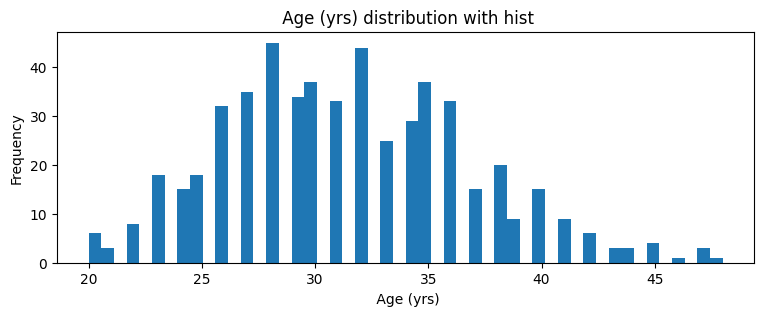

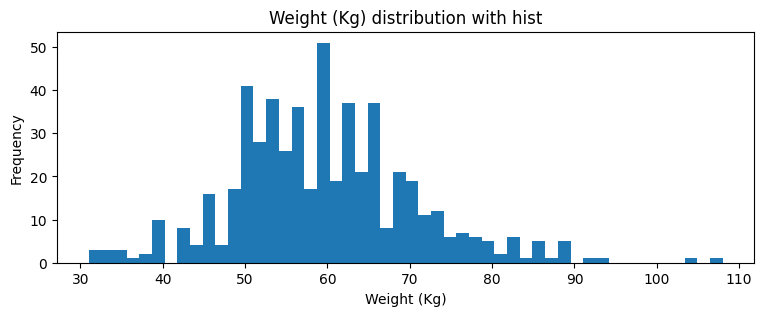

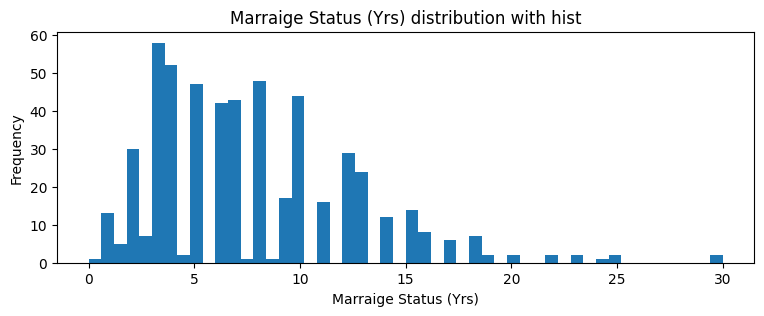

In [ ]:
# histogram plotting
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

numericVar = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

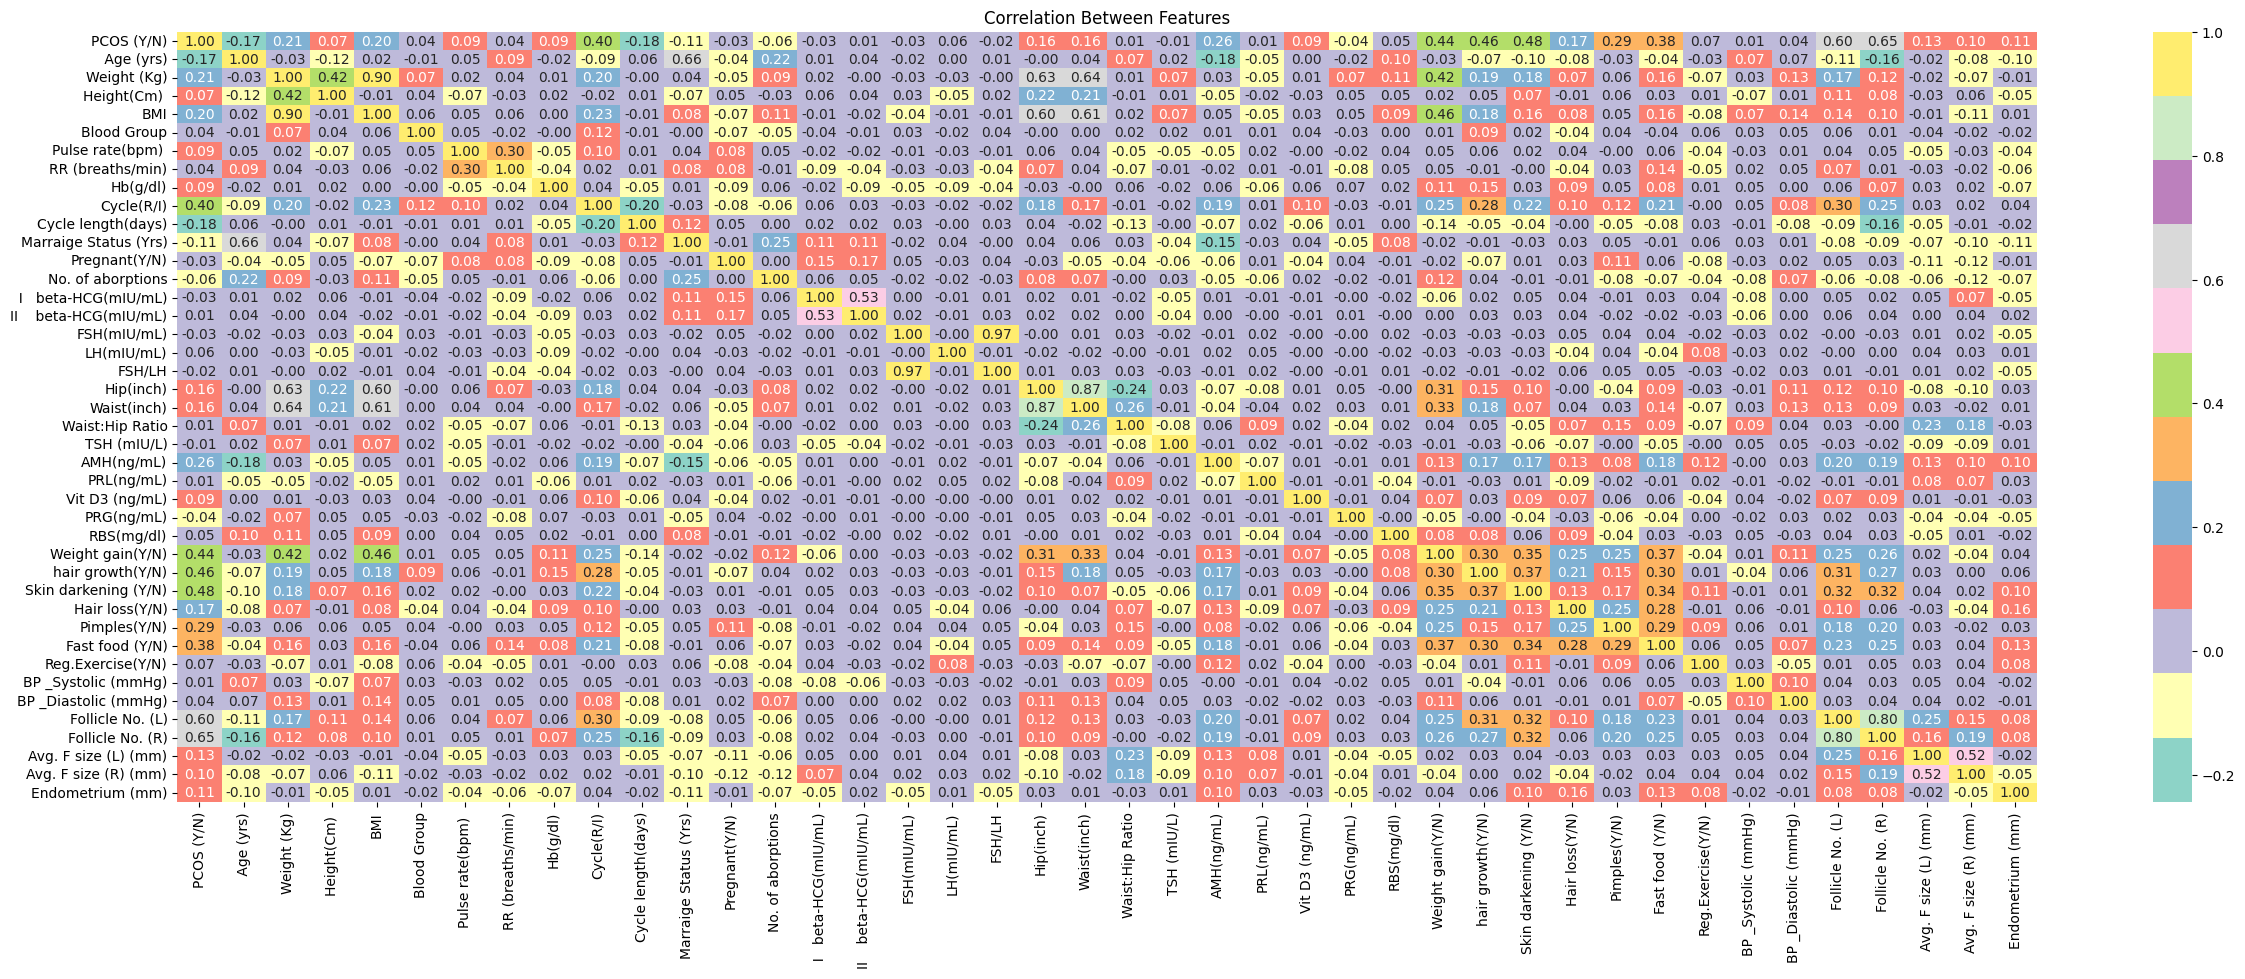

In [ ]:
# heatmap plotting
corr_matrix= data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

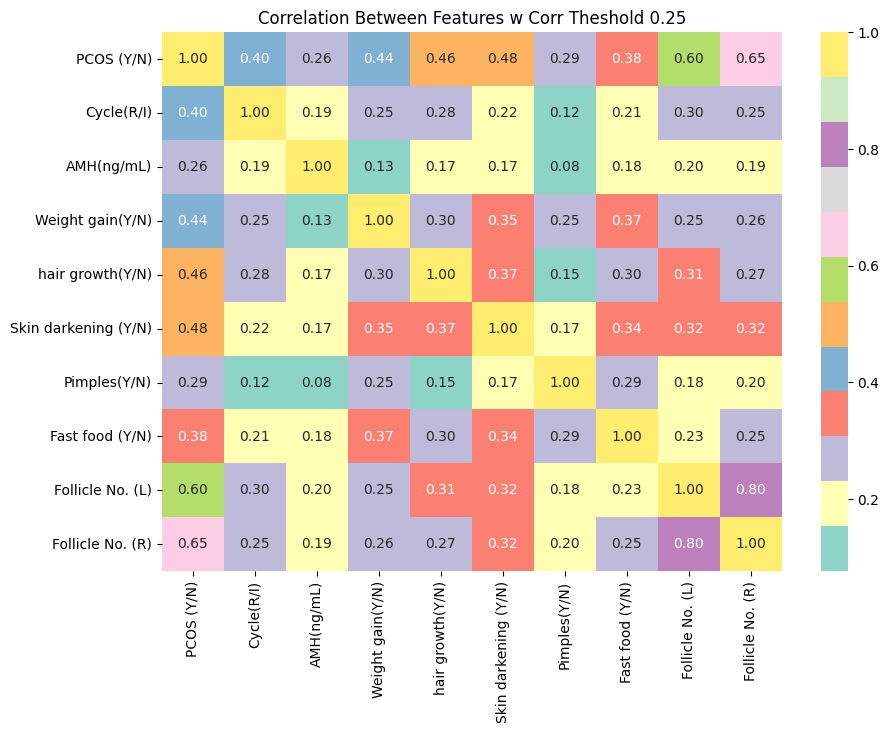

In [ ]:
threshold = 0.25 
filtre = np.abs(corr_matrix["PCOS (Y/N)"]) > threshold 
corr_features = corr_matrix.columns[filtre].tolist()
plt.subplots(figsize=(10,7))
sns.heatmap(data[corr_features].corr(),cmap="Set3", annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.25")
plt.show()

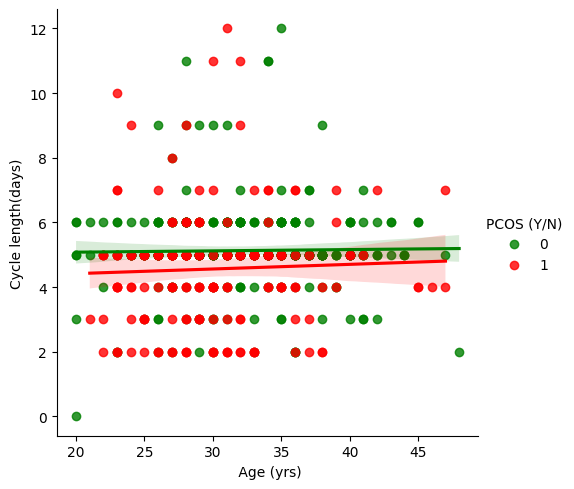

In [ ]:
# Length of menstrual phase in PCOS vs normal 
color = ["green","red"]
fig=sns.lmplot(data=data,x=" Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

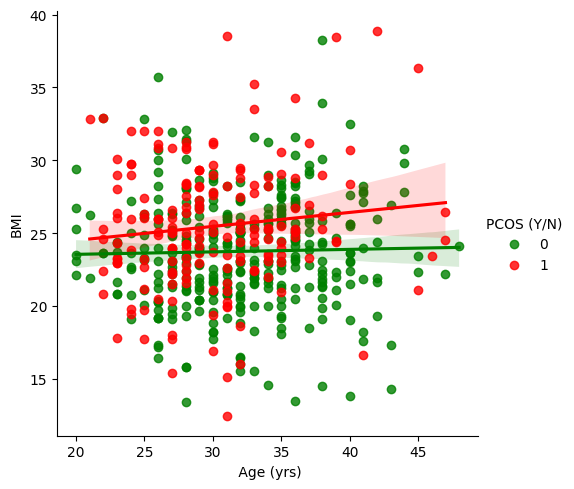

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

In [ ]:
# Convert 'AMH(ng/mL)' to numeric, coercing errors which will turn problematic entries to NaN
pcos['AMH(ng/mL)'] = pd.to_numeric(pcos['AMH(ng/mL)'], errors='coerce')

# Check again for missing values after conversion
amh_missing_after_conversion = pcos['AMH(ng/mL)'].isnull().sum()

# Re-describe the data to see changes and identify any further issues
pcos_revised_description = pcos.describe()

amh_missing_after_conversion, pcos_revised_description

(1,
            Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
 count  541.000000        541.000000  541.000000              541.000000   
 mean   271.000000      10271.000000    0.327172              664.549235   
 std    156.317519        156.317519    0.469615             3348.920576   
 min      1.000000      10001.000000    0.000000                1.300000   
 25%    136.000000      10136.000000    0.000000                1.990000   
 50%    271.000000      10271.000000    0.000000               20.000000   
 75%    406.000000      10406.000000    1.000000              297.210000   
 max    541.000000      10541.000000    1.000000            32460.970000   
 
        II    beta-HCG(mIU/mL)  AMH(ng/mL)  
 count              541.000000  540.000000  
 mean               238.229518    5.624191  
 std               1603.826221    5.881608  
 min                  0.110417    0.100000  
 25%                  1.990000    2.010000  
 50%                  1.990000    3.7000

In [ ]:
import sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

feature selection: hormone level+pcos(Y/N)

In [ ]:
data['II    beta-HCG(mIU/mL)'].find('1.99.')
data['II    beta-HCG(mIU/mL)'].astype('float')


AttributeError: 'Series' object has no attribute 'find'

In [ ]:
df_new = data.apply(pd.to_numeric, errors='coerce')
df_new = df_new[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)','Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)','  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)']]
df_new.dropna(inplace=True)

X = df_new.drop(['PCOS (Y/N)'],axis=1)
y = df_new['PCOS (Y/N)']
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9166666666666666
Confusion Matrix:
[[74  3]
 [ 6 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        77
           1       0.89      0.81      0.85        31

    accuracy                           0.92       108
   macro avg       0.91      0.88      0.90       108
weighted avg       0.92      0.92      0.92       108



In [ ]:
#attempting to detect overfitting
y_pred_train = logreg.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
conf_matrix_train = confusion_matrix(y_train,y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)
print("Accuracy:", accuracy_train)
print("Confusion Matrix:")
print(conf_matrix_train)
print("Classification Report:")
print(classification_rep_train)

Accuracy: 0.8790697674418605
Confusion Matrix:
[[260  25]
 [ 27 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       285
           1       0.83      0.81      0.82       145

    accuracy                           0.88       430
   macro avg       0.87      0.86      0.86       430
weighted avg       0.88      0.88      0.88       430



In [ ]:
from sklearn.model_selection import train_test_split

# Handling missing value by imputing with median
pcos['AMH(ng/mL)'].fillna(pcos['AMH(ng/mL)'].median(), inplace=True)

# Handling outliers: Capping values at the 95th percentile for beta-HCG levels
for column in ['  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)']:
    percentile_95 = pcos[column].quantile(0.95)
    pcos[column] = pcos[column].clip(upper=percentile_95)

# Prepare features and target variable
X = pcos[['  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']]
y = pcos['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the splits and prepare for modeling
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train

TypeError: Cannot convert ['2.07' '1.53' '6.63' '1.22' '2.26' '6.74' '3.05' '1.54' '1' '1.61' '4.47'
 '1.67' '7.94' '2.38' '0.88' '0.69' '3.78' '1.92' '1' '2.07' '2.85' '2.13'
 '4.13' '2.5' '1.89' '0.26' '3.84' '2.5' '3.56' '1.56' '1.69' '1.89'
 '2.34' '1.58' '2.36' '3.64' '2.78' '0.88' '2.36' '0.33' '2.35' '3.88'
 '3.55' '4.33' '3.55' '2.36' '3.66' '4.33' '1' '4.5' '3.2' '2.1' '4.5'
 '6.55' '1.2' '2.33' '3.22' '2.333' '2.31' '2.36' '4.2' '3.21' '2.14'
 '2.3' '4.6' '2.3' '5.8' '5.2' '2.14' '4.63' '1.01' '2.58' '5.8' '0.35'
 '5.23' '3.68' '2.14' '2.55' '4.91' '1.03' '6.56' '3.91' '5.42' '1.65'
 '2.06' '1.81' '3.81' '2.26' '3.65' '8.98' '1.7' '3.18' '2.75' '0.86'
 '2.29' '2.19' '8.46' '4.59' '1.04' '4.27' '3.86' '1.42' '10.07' '0.98'
 '4.07' '3.2' '3.9' '10' '16.9' '17' '21.9' '1.6' '3.3' '21' '12.7' '1.8'
 '3.6' '15' '5' '3.3' '3.3' '3.9' '17.9' '19.8' '9.2' '2.4' '4.5' '5.14'
 '2.4' '0.3' '11.48' '19.3' '8.8' '19' '4.3' '1.4' '12.6' '4.8' '4.6'
 '17.1' '2.1' '11.6' '18.4' '1.8' '9.9' '3.7' '2.9' '2' '4' '1.6' '15.9'
 '7.51' '10.04' '6.86' '7.02' '8.75' '5.27' '1.4' '9' '3.56' '3.41' '0.45'
 '2.53' '0.29' '2.6' '2.83' '1.89' '2.01' '2.83' '5.67' '1.68' '3.65'
 '3.63' '3.49' '2.01' '8' '9' '11.48' '10.25' '2.36' '32' '3.38' '1.35'
 '2.38' '5.78' '4.66' '1.99' '1.28' '3.99' '5.69' '7.81' '6.41' '5.76'
 '1.68' '8.75' '6.65' '4.15' '1.86' '2.04' '7.25' '1.04' '1.91' '2.3'
 '5.61' '3.02' '5.25' '2.38' '7' '3.17' '5.57' '4.57' '0.37' '16.9' '26.4'
 '5.96' '9.1' '6.6' '22' '1.9' '4.3' '0.37' '17.6' '1.1' '7.8' '2.9' '7.7'
 '9.7' '0.2' '2.5' '12' '1.4' '16.7' '13.6' '16.8' '3.5' '1.3' '3.14'
 '1.25' '7.7' '7.3' '7.2' '3.29' '2.69' '2.1' '4.1' '6.2' '14.6' '4.71'
 '1.25' '1' '11.1' '1.9' '6.2' '1.9' '1.5' '2.9' '2.25' '6.8' '0.8' '7.21'
 '4.2' '6.2' '0.9' '16.8' '16.9' '8.5' '3.9' '66' '26.8' '1.15' '4.1'
 '3.2' '0.16' '8.1' '0.56' '5.3' '1.8' '7.3' '6.5' '21' '0.9' '15.3'
 '10.6' '4.2' '4.7' '4.8' '1.7' '5.4' '1.2' '5.4' '17.5' '6' '2' '21.8'
 '18.5' '12.4' '10.8' '4.5' '4.2' '1.2' '10.8' '10' '18.7' '18' '0.28' 'a'
 '1.03' '3.02' '1' '1.5' '3' '1' '1.06' '3.05' '5.4' '3.02' '2.23' '2.06'
 '3.33' '1' '2.65' '11' '3.6' '5.7' '1.03' '6.33' '2.5' '2.2' '15.7' '3.5'
 '1.1' '1.3' '3' '3' '2.17' '3.3' '14.7' '2.8' '1.06' '9.1' '5.9' '8.9'
 '3.6' '2.31' '3.6' '2.8' '20.4' '1.5' '4.6' '5' '3.9' '9.8' '3.65' '3.5'
 '10.7' '4.8' '4.5' '2.6' '3.9' '3.09' '10.9' '5.2' '1.6' '1' '6.4' '2.8'
 '6.4' '2.19' '15' '2.5' '4.2' '5.1' '6' '5.8' '0.2' '9' '1.2' '9.1' '2.9'
 '3.1' '5.6' '7.9' '18.9' '11.4' '3.8' '4.5' '2' '4.5' '3.1' '2.9' '9.1'
 '1.2' '9' '0.2' '5.8' '6' '5.1' '2.5' '1.6' '1.9' '1.14' '5.7' '28.6'
 '5.5' '3.8' '4.2' '0.5' '0.9' '4.8' '1.3' '6.4' '8.1' '10.8' '5.2' '7.2'
 '15' '3.4' '2.28' '2.6' '4.8' '11.9' '6.9' '0.1' '12.8' '2.7' '6' '0.84'
 '2.9' '4.6' '20' '8.9' '1.2' '2.8' '10.3' '9.9' '2.5' '3.6' '8' '1.01'
 '10.2' '11' '0.6' '0.5' '0.37' '16.9' '26.4' '5.96' '6.2' '9.1' '0.8'
 '0.91' '0.98' '0.89' '0.87' '9.7' '7.7' '1.1' '17.6' '6.6' '5' '7' '9'
 '0.7' '10' '0.85' '6' '6' '0.78' '16' '0.74' '0.91' '0.99' '0.9' '4.13'
 '4.02' '6.09' '0.71' '3.62' '0.89' '1.97' '1.4' '3.03' '3.86' '5.75'
 '6.26' '0.72' '10.53' '10.32' '2.39' '2.7' '1.1' '4.9' '10.6' '4.3' '5.1'
 '16.8' '7.9' '3.1' '5.1' '11.2' '1.7' '5.2' '2.2' '1.3' '12' '3.3' '1.7'
 '0.9' '4.9' '16.6' '17.6' '4.6' '5.5' '2.2' '18.9' '10' '16' '5.4' '3.7'
 '5.5' '7.2' '2.5' '18.5' '7.7' '0.19' '0.6' '2.5' '3.7' '0.8' '2.3' '1'
 '0.7' '6.3' '19.6' '18.2' '7.6' '1.7' '5.6' '3.7' '5.2' '20'] to numeric

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, conf_mat

(0.6972477064220184,
 0.4444444444444444,
 0.125,
 0.1951219512195122,
 array([[72,  5],
        [28,  4]]))

Accuracy: 69.72%
Precision: 44.44% (proportion of positive identifications that were actually correct)
Recall: 12.50% (proportion of actual positives that were identified correctly)
F1 Score: 19.51% (harmonic mean of precision and recall)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       109
           1       0.86      0.81      0.83        53

    accuracy                           0.90       162
   macro avg       0.89      0.87      0.88       162
weighted avg       0.89      0.90      0.89       162



<AxesSubplot: >

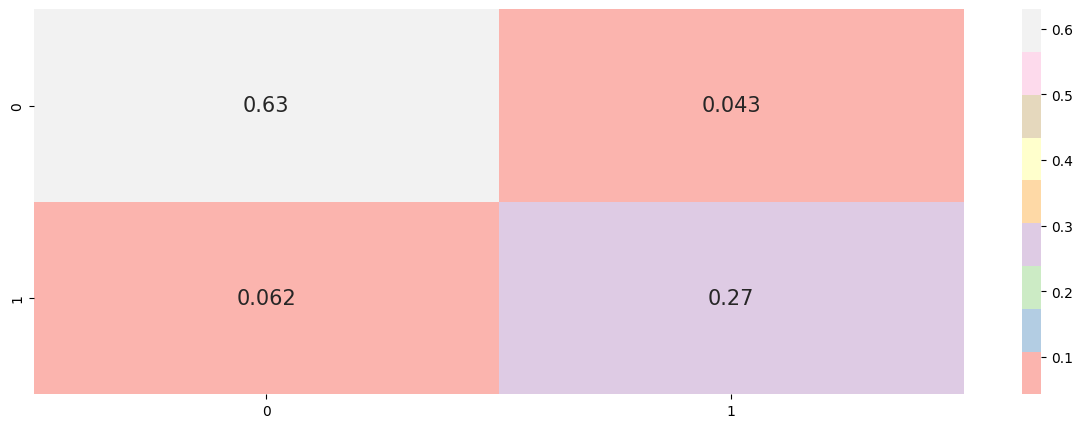

In [ ]:
classi_report = classification_report(y_test, y_pred)
print(classi_report)
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

In [ ]:
#Random forest model
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10) 
rfc.fit(x_train, y_train) 
pred_rfc = rfc.predict(x_test) #prediction
rfcaccuracy = accuracy_score(y_test, pred_rfc)
print(rfcaccuracy)

0.9135802469135802


In [ ]:
classi_report = classification_report(y_test, pred_rfc)
print(classi_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        56
           1       0.95      0.76      0.84        25

    accuracy                           0.91        81
   macro avg       0.93      0.87      0.89        81
weighted avg       0.92      0.91      0.91        81



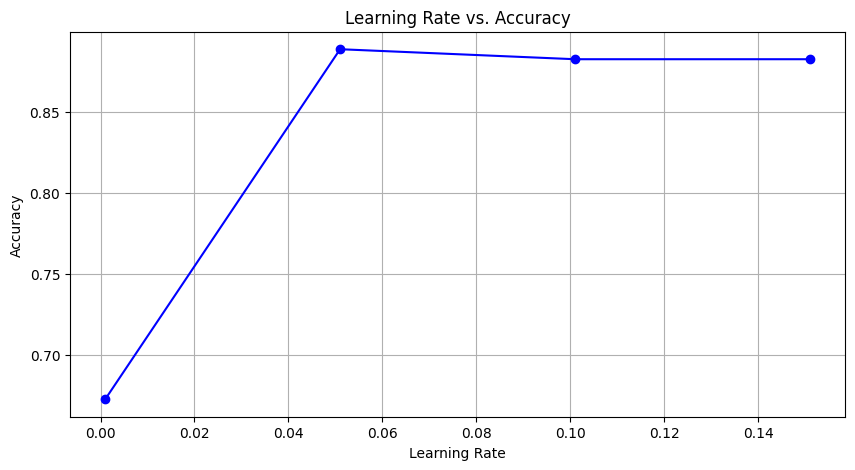

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store learning rates and accuracies
learning_rates = []
accuracies = []

i = 0.001
while i < 0.2:
    # Create and fit the model
    xgb_cl = xgb.XGBClassifier(learning_rate=i, gamma=0.01, max_depth=20, subsample=0.8)
    xgb_cl.fit(x_train, y_train)
    
    # Predict and calculate accuracy
    preds = xgb_cl.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    
    # Append the learning rate and accuracy to the lists
    learning_rates.append(i)
    accuracies.append(accuracy)
    
    # Increment the learning rate
    i += 0.05

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.title('Learning Rate vs. Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
xgb_cl = xgb.XGBClassifier(learning_rate=0.05, gamma=0.01, max_depth=20, subsample=0.8)
xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_test)
classi_report = classification_report(y_test, preds)
print(classi_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       109
           1       0.87      0.77      0.82        53

    accuracy                           0.89       162
   macro avg       0.88      0.86      0.87       162
weighted avg       0.89      0.89      0.89       162



Exploratory Data Analysis

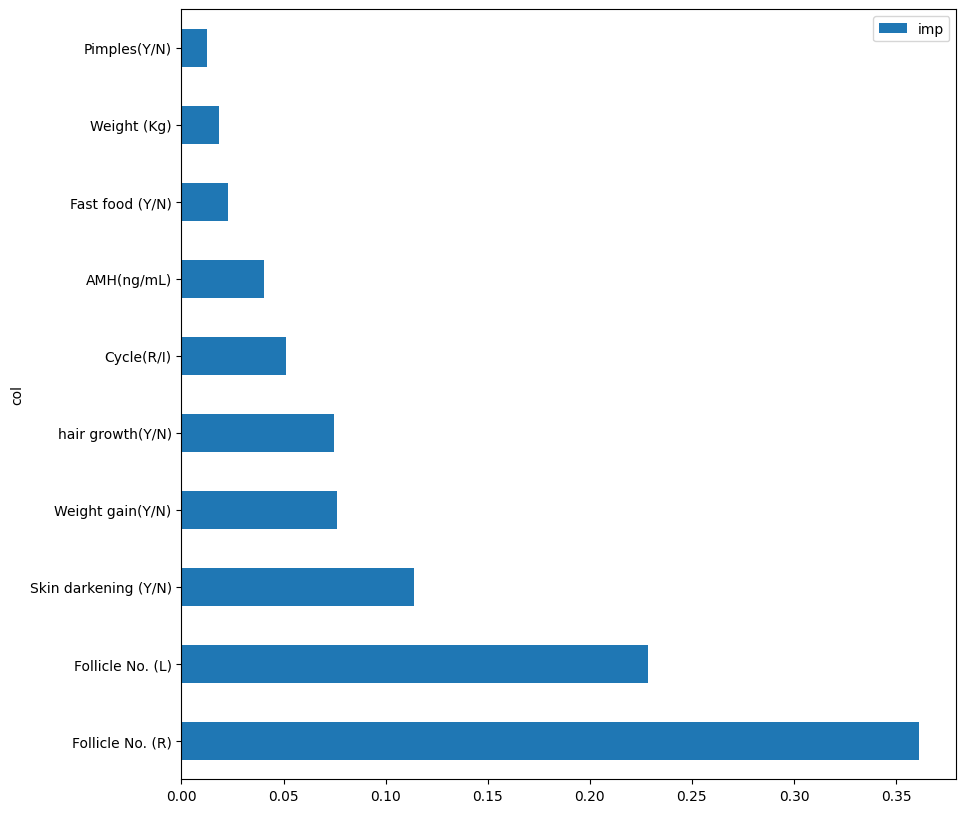

In [ ]:
def get_fi(m, df):
    return pd.DataFrame({'col': df.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(rfc,x_train)

def plot_fi(df):
    df.plot('col','imp','barh',figsize=(10,10))
    
plot_fi(fi)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=65f58ecd-3492-48f5-8921-f37a17706b4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>